# quant-econ Solutions: On-the-Job Search

Solutions for http://quant-econ.net/py/jv.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from quantecon import compute_fixed_point
from jv import JvWorker

## Exercise 1

Here’s code to produce the 45 degree diagram

Computing value function
Computing policy functions


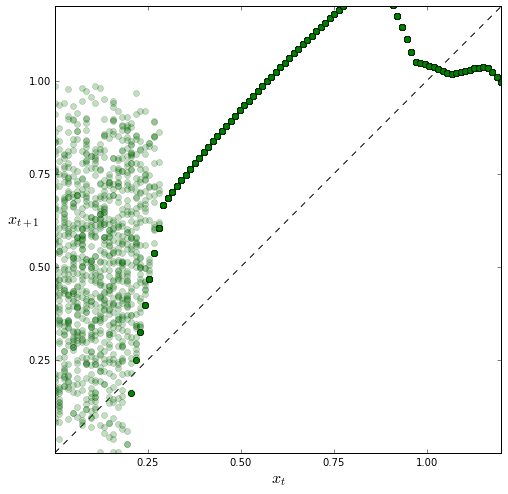

In [3]:

wp = JvWorker(grid_size=25)
G, pi, F = wp.G, wp.pi, wp.F       # Simplify names

v_init = wp.x_grid * 0.5
print("Computing value function")
V = compute_fixed_point(wp.bellman_operator, v_init, max_iter=40, verbose=False)
print("Computing policy functions")
s_policy, phi_policy = wp.bellman_operator(V, return_policies=True)

# Turn the policy function arrays into actual functions
s = lambda y: np.interp(y, wp.x_grid, s_policy)
phi = lambda y: np.interp(y, wp.x_grid, phi_policy)

def h(x, b, U):
    return (1 - b) * G(x, phi(x)) + b * max(G(x, phi(x)), U)

plot_grid_max, plot_grid_size = 1.2, 100
plot_grid = np.linspace(0, plot_grid_max, plot_grid_size)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0, plot_grid_max)
ax.set_ylim(0, plot_grid_max)
ticks = (0.25, 0.5, 0.75, 1.0)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xlabel(r'$x_t$', fontsize=16)
ax.set_ylabel(r'$x_{t+1}$', fontsize=16, rotation='horizontal')

ax.plot(plot_grid, plot_grid, 'k--')  # 45 degree line
for x in plot_grid:
    for i in range(50):
        b = 1 if random.uniform(0, 1) < pi(s(x)) else 0
        U = wp.F.rvs(1)
        y = h(x, b, U)
        ax.plot(x, y, 'go', alpha=0.25)

plt.show()

Looking at the dynamics, we can see that 

* If $x_t$ is below about 0.2 the dynamics are random, but $x_{t+1} > x_t$ is very likely
* As $x_t$ increases the dynamics become deterministic, and $x_t$ converges to a steady state value close to 1

Referring back to the figure here

http://quant-econ.net/py/jv.html#solving-for-policies

we see that $x_t \approx 1$ means that $s_t = s(x_t) \approx 0$ and $\phi_t = \phi(x_t) \approx 0.6$



## Exercise 2

The figure can be produced as follows

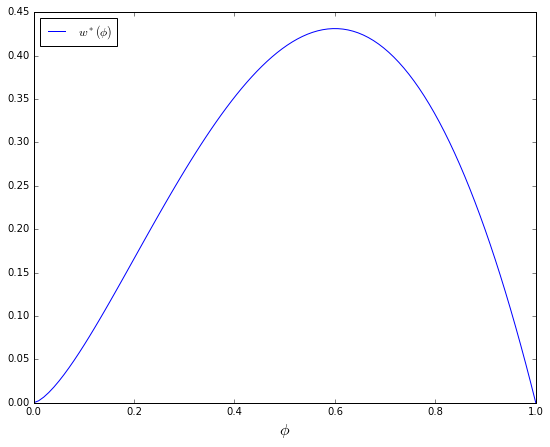

In [4]:

wp = JvWorker(grid_size=25)

def xbar(phi):
    return (wp.A * phi**wp.alpha)**(1 / (1 - wp.alpha))

phi_grid = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_xlabel(r'$\phi$', fontsize=16)
ax.plot(phi_grid, [xbar(phi) * (1 - phi) for phi in phi_grid], 'b-', label=r'$w^*(\phi)$')
ax.legend(loc='upper left')

plt.show()

Observe that the maximizer is around 0.6

This this is similar to the long run value for $\phi$ obtained
in exercise 1

Hence the behaviour of the infinitely patent worker is similar to that of the
worker with $\beta = 0.96$

This seems reasonable, and helps us confirm that our dynamic programming
solutions are probably correct
